<a href="https://colab.research.google.com/github/rename-z/Deep-Learning/blob/master/Zero%20to%20GANs/Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Image Classification using Logistic Regression in PyTorch**

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='/content', download=True)

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw


Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='/content', train=False)

In [5]:
len(test_dataset)

10000

In [6]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FA2624B2208>, 5)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

Label :  1


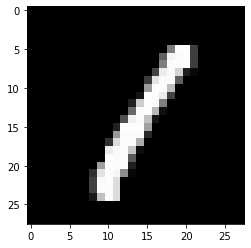

In [8]:
image, label = dataset[3]
plt.imshow(image, cmap='gray')
print('Label : ', label)

Label :  6


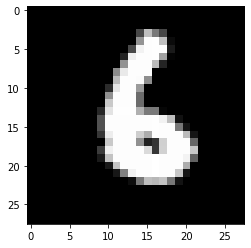

In [9]:
image, label = dataset[36]
plt.imshow(image, cmap='gray')
print('Label : ', label)

In [10]:
import torchvision.transforms as transform
from torch.utils.data import random_split
from torch.utils.data import DataLoader

In [11]:
dataset = MNIST(root='/content', transform=transform.ToTensor())

In [12]:
img_tensor, label = dataset[36]
img_tensor.shape, label

(torch.Size([1, 28, 28]), 6)

In [13]:
print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.1686, 0.8980, 0.9922, 0.9922, 0.6078],
         [0.5686, 0.9922, 0.9922, 0.9922, 0.4196],
         [0.7882, 0.9922, 0.9922, 0.9922, 0.4196],
         [0.8902, 0.9961, 0.9961, 0.9961, 0.6902],
         [0.9922, 0.9922, 0.9922, 0.9922, 0.9922]]])
tensor(1.) tensor(0.)


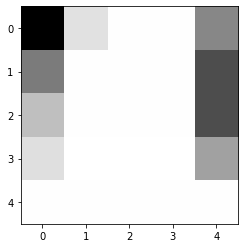

In [14]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

In [15]:
train_ds, val_ds = random_split(dataset, [50000, 10000])

In [16]:
len(train_ds)

50000

In [17]:
len(val_ds)

10000

In [18]:
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

### *Model*

In [19]:
import torch.nn as nn
import torch.nn.functional as F

In [20]:
in_features = 28 * 28
out_features = 10

model = nn.Linear(in_features, out_features)

In [21]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0003, -0.0179,  0.0329,  ...,  0.0301, -0.0183,  0.0079],
         [ 0.0044,  0.0262, -0.0104,  ...,  0.0033, -0.0212,  0.0128],
         [ 0.0183, -0.0107,  0.0272,  ...,  0.0013,  0.0144,  0.0103],
         ...,
         [-0.0240,  0.0126,  0.0183,  ...,  0.0052, -0.0185,  0.0301],
         [ 0.0015, -0.0253,  0.0249,  ..., -0.0301,  0.0043,  0.0218],
         [-0.0013,  0.0249, -0.0340,  ..., -0.0013,  0.0218,  0.0164]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0120,  0.0173,  0.0183,  0.0347, -0.0259,  0.0238, -0.0106,  0.0180,
          0.0245, -0.0190], requires_grad=True)]

In [22]:
model.weight.shape

torch.Size([10, 784])

In [23]:
model.bias.shape

torch.Size([10])

In [24]:
for images, labels in train_loader :
  print(labels)
  print(images.shape)
  outputs = model(images)
  break

tensor([8, 8, 7, 9, 7, 8, 6, 2, 7, 5, 7, 9, 7, 1, 1, 9, 9, 9, 2, 4, 6, 5, 3, 7,
        3, 0, 8, 9, 6, 8, 0, 0, 8, 4, 1, 8, 8, 4, 1, 3, 1, 7, 2, 8, 3, 4, 3, 7,
        4, 0, 1, 4, 3, 8, 2, 9, 6, 4, 8, 5, 0, 2, 4, 7, 1, 0, 8, 5, 1, 7, 2, 3,
        2, 7, 2, 2, 3, 6, 8, 4, 4, 4, 3, 9, 6, 0, 4, 2, 3, 9, 1, 6, 4, 5, 8, 7,
        0, 8, 0, 0, 2, 5, 7, 5, 5, 4, 4, 4, 6, 1, 7, 5, 7, 5, 2, 0, 7, 6, 4, 8,
        5, 9, 6, 2, 0, 9, 7, 7])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

In [25]:
class MnistModel(nn.Module) :
  def __init__(self) :
    super().__init__()
    self.linear = nn.Linear(in_features, out_features)

  def forward(self, xb) :
    xb = xb.reshape(-1, 1*28*28)
    out = self.linear(xb)
    return out

model = MnistModel()

In [26]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0182, -0.0164, -0.0225,  ..., -0.0032,  0.0092,  0.0110],
         [ 0.0097,  0.0336,  0.0299,  ..., -0.0180,  0.0095, -0.0338],
         [-0.0210, -0.0055,  0.0118,  ...,  0.0166, -0.0278, -0.0289],
         ...,
         [-0.0102, -0.0181, -0.0352,  ..., -0.0165, -0.0137, -0.0231],
         [ 0.0172,  0.0338,  0.0186,  ...,  0.0264, -0.0341,  0.0232],
         [ 0.0253, -0.0263, -0.0128,  ..., -0.0153,  0.0320, -0.0130]],
        requires_grad=True), Parameter containing:
 tensor([-0.0154,  0.0237,  0.0338, -0.0027,  0.0128,  0.0200,  0.0079, -0.0178,
          0.0120, -0.0343], requires_grad=True)]

In [27]:
model.linear.weight.shape

torch.Size([10, 784])

In [28]:
model.linear.bias.shape

torch.Size([10])

In [29]:
for images, labels in train_loader :
  output = model(images)
  break

print('output.shape : ', output.shape)
print('Sample outputs : \n', output[:2])

output.shape :  torch.Size([128, 10])
Sample outputs : 
 tensor([[ 0.1724, -0.4875, -0.0875, -0.0216,  0.1614, -0.1926,  0.2560, -0.1123,
          0.1112, -0.1457],
        [ 0.2853, -0.0796, -0.3942,  0.0090,  0.1001, -0.0318, -0.1369, -0.0311,
         -0.2842, -0.0446]], grad_fn=<SliceBackward>)


In [30]:
probs = F.softmax(output, dim=1)

print('Sample probability : \n', probs[:2].data)
print('Sum : ', torch.sum(probs[0]).item())

Sample probability : 
 tensor([[0.1204, 0.0623, 0.0929, 0.0992, 0.1191, 0.0836, 0.1309, 0.0906, 0.1133,
         0.0876],
        [0.1391, 0.0966, 0.0705, 0.1055, 0.1156, 0.1013, 0.0912, 0.1014, 0.0787,
         0.1000]])
Sum :  1.0000001192092896


In [31]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([6, 0, 6, 0, 7, 0, 0, 0, 6, 0, 1, 6, 1, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 7,
        0, 6, 6, 5, 0, 6, 0, 0, 0, 7, 0, 6, 0, 6, 5, 0, 0, 5, 0, 6, 1, 7, 0, 0,
        0, 0, 0, 5, 6, 0, 5, 7, 0, 0, 0, 0, 0, 0, 0, 6, 6, 0, 0, 7, 0, 3, 0, 0,
        0, 0, 0, 0, 9, 6, 0, 4, 0, 6, 4, 0, 0, 0, 2, 1, 0, 0, 6, 0, 6, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 6, 4, 6, 0, 0, 0, 5, 0, 1, 0, 6, 0, 5, 1, 0, 6, 0, 4,
        1, 5, 1, 6, 0, 0, 0, 5])
tensor([0.1309, 0.1391, 0.1240, 0.1191, 0.1257, 0.1242, 0.1284, 0.1290, 0.1277,
        0.1373, 0.1323, 0.1293, 0.1159, 0.1214, 0.1121, 0.1100, 0.1454, 0.1277,
        0.1288, 0.1165, 0.1217, 0.1232, 0.1299, 0.1333, 0.1544, 0.1261, 0.1337,
        0.1187, 0.1362, 0.1335, 0.1417, 0.1398, 0.1359, 0.1193, 0.1400, 0.1318,
        0.1267, 0.1556, 0.1190, 0.1571, 0.1264, 0.1202, 0.1316, 0.1333, 0.1196,
        0.1220, 0.1673, 0.1450, 0.1370, 0.1278, 0.1265, 0.1326, 0.1529, 0.1261,
        0.1187, 0.1261, 0.1413, 0.1383, 0.1522, 0.1378, 0.1319, 0.1319, 0.1568,
       

In [32]:
labels

tensor([2, 7, 0, 3, 4, 3, 6, 1, 4, 6, 7, 0, 7, 0, 7, 7, 5, 6, 2, 7, 9, 7, 5, 3,
        2, 5, 0, 9, 3, 5, 3, 5, 2, 0, 6, 2, 9, 0, 7, 2, 5, 9, 1, 7, 4, 7, 6, 1,
        2, 5, 9, 5, 9, 9, 5, 3, 1, 0, 6, 8, 7, 5, 2, 6, 9, 1, 7, 8, 9, 3, 1, 1,
        8, 2, 5, 4, 2, 6, 1, 2, 1, 6, 2, 9, 1, 8, 0, 7, 8, 2, 6, 1, 6, 5, 7, 3,
        8, 6, 1, 8, 4, 9, 3, 9, 0, 3, 7, 9, 5, 7, 1, 2, 6, 6, 7, 1, 3, 4, 3, 4,
        7, 7, 2, 6, 2, 5, 6, 7])

In [33]:
def accuracy(outputs, labels) :
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [34]:
accuracy(output, labels)

tensor(0.1250)

In [35]:
loss_fn = F.cross_entropy

In [36]:
loss = loss_fn(output, labels)
print(loss)

tensor(2.2901, grad_fn=<NllLossBackward>)


In [37]:
class MnistModel(nn.Module) :
  def __init__(self) :
    super().__init__()
    self.linear = nn.Linear(in_features, out_features)

  def forward(self, xb) :
    xb = xb.reshape(-1, 1*28*28)
    out = self.linear(xb)
    return out

  def training_step(self, batch) :
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    return loss

  def validation_step(self, batch) :
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    acc = accuracy(out, labels)
    return {'val_loss': loss, 'val_acc': acc}

  def validation_epoch_end(self, outputs) :
    batch_loss = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_loss).mean()
    batch_acc = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_acc).mean()
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

  def epoch_end(self, epoch, result) :
    print('Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}'.format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [38]:
def evaluate(model, val_loader) :
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD) :
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in range(epochs) :
    for batch in train_loader :
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)
  return history

In [39]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.09721123427152634, 'val_loss': 2.319135904312134}

In [40]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9519, val_acc: 0.6127
Epoch [1], val_loss: 1.6830, val_acc: 0.7170
Epoch [2], val_loss: 1.4819, val_acc: 0.7586
Epoch [3], val_loss: 1.3296, val_acc: 0.7828
Epoch [4], val_loss: 1.2122, val_acc: 0.7948


In [41]:
history2 = fit(5, 1e-5, model, train_loader, val_loader)

Epoch [0], val_loss: 1.2111, val_acc: 0.7952
Epoch [1], val_loss: 1.2101, val_acc: 0.7954
Epoch [2], val_loss: 1.2091, val_acc: 0.7955
Epoch [3], val_loss: 1.2080, val_acc: 0.7955
Epoch [4], val_loss: 1.2070, val_acc: 0.7959


In [42]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1155, val_acc: 0.8069
Epoch [1], val_loss: 1.0418, val_acc: 0.8165
Epoch [2], val_loss: 0.9813, val_acc: 0.8238
Epoch [3], val_loss: 0.9307, val_acc: 0.8288
Epoch [4], val_loss: 0.8879, val_acc: 0.8341


In [43]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8511, val_acc: 0.8388
Epoch [1], val_loss: 0.8192, val_acc: 0.8421
Epoch [2], val_loss: 0.7912, val_acc: 0.8463
Epoch [3], val_loss: 0.7664, val_acc: 0.8495
Epoch [4], val_loss: 0.7443, val_acc: 0.8512


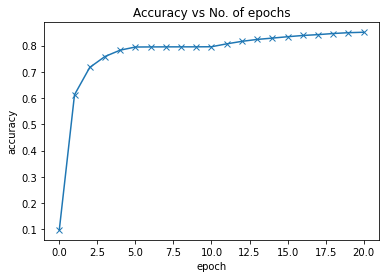

In [44]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs No. of epochs');